In [1]:
import torch
import matplotlib.pyplot as plt
from hifi_gan import Generator
from processor import HiFiGANProcessor

In [2]:
checkpoint = torch.load("hifi_gan.pt", map_location='cpu')

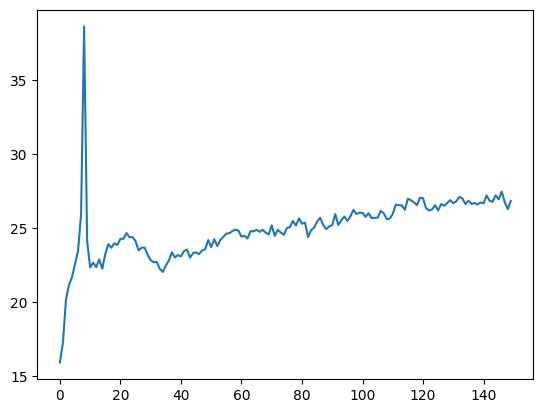

In [4]:
plt.plot(checkpoint['loss'])

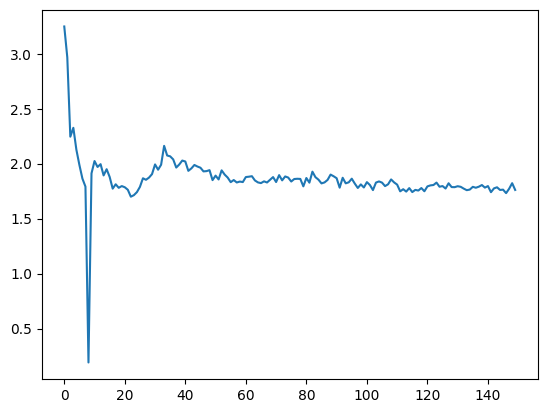

In [5]:
plt.plot(checkpoint['dis_loss'])

In [6]:
generator = Generator(
    n_mel_channels=80,
    upsample_rates=[8,8,2,2],
    upsample_kernel_sizes=[16,16,4,4],
    upsample_initial_channel=512,
    resblock_kernel_sizes=[3,7,11],
    resblock_dilation_sizes=[[1,3,5], [1,3,5], [1,3,5]]
)

In [7]:
checkpoint.keys()

dict_keys(['generator_state_dict', 'multi_period_state_dict', 'multi_scale_state_dict', 'generator_optimizer_state_dict', 'discriminator_optimizer_state_dict', 'epoch', 'loss', 'val_loss', 'dis_loss'])

In [8]:
generator.load_state_dict(checkpoint['generator_state_dict'])

<All keys matched successfully>

In [9]:
generator.to('cuda')

Generator(
  (conv_pre): Conv1d(80, 512, kernel_size=(7,), stride=(1,), padding=(3,))
  (ups): ModuleList(
    (0): ConvTranspose1d(512, 256, kernel_size=(16,), stride=(8,), padding=(4,))
    (1): ConvTranspose1d(256, 128, kernel_size=(16,), stride=(8,), padding=(4,))
    (2): ConvTranspose1d(128, 64, kernel_size=(4,), stride=(2,), padding=(1,))
    (3): ConvTranspose1d(64, 32, kernel_size=(4,), stride=(2,), padding=(1,))
  )
  (resblocks): ModuleList(
    (0): ResBlock1(
      (convs1): ModuleList(
        (0): Conv1d(256, 256, kernel_size=(3,), stride=(1,), padding=(1,))
        (1): Conv1d(256, 256, kernel_size=(3,), stride=(1,), padding=(3,), dilation=(3,))
        (2): Conv1d(256, 256, kernel_size=(3,), stride=(1,), padding=(5,), dilation=(5,))
      )
      (convs2): ModuleList(
        (0-2): 3 x Conv1d(256, 256, kernel_size=(3,), stride=(1,), padding=(1,))
      )
    )
    (1): ResBlock1(
      (convs1): ModuleList(
        (0): Conv1d(256, 256, kernel_size=(7,), stride=(1,), 

In [10]:
processor = HiFiGANProcessor()

In [11]:
signal = processor.load_audio("/home/alan/datasets/infore_tech/data/00000.wav")

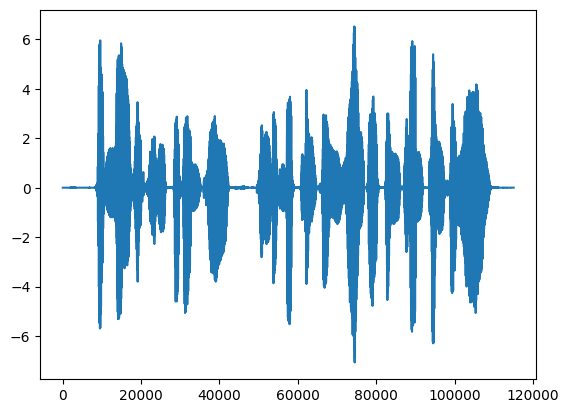

In [12]:
plt.plot(signal)

In [13]:
mel = processor.mel_spectrogram(signal)

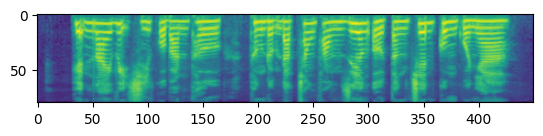

In [14]:
plt.imshow(mel)

In [15]:
mel = torch.FloatTensor(mel).to('cuda').unsqueeze(0)

In [16]:
mel.shape

torch.Size([1, 80, 450])

In [17]:
with torch.no_grad():
    output = generator(mel)

In [18]:
output.shape

torch.Size([1, 1, 115200])

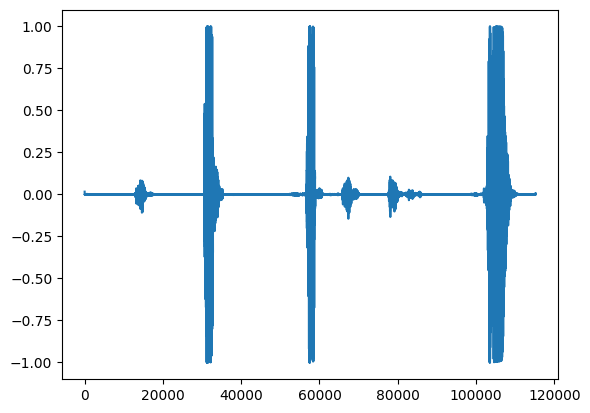

In [19]:
plt.plot(output[0][0].cpu().numpy())

In [23]:
_mel = processor.mel_spectrogram(output[0][0].cpu().numpy())

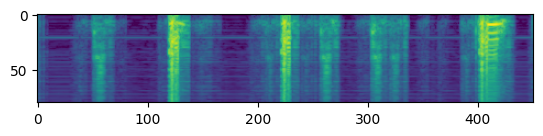

In [24]:
plt.imshow(_mel)